In [1]:
import pandas as pd

data = pd.read_csv('movie_data.csv')

In [2]:
data.head(5)

# Stars determine sentiment analysis
# > 7 positive -> label = 1
# <= 4 negative -> label = 0

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [3]:
data.shape

(50000, 2)

In [4]:
data['sentiment'].value_counts()
data = data[:1000]

In [5]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()

bag = count.fit_transform(data['review'])

In [6]:
count.vocabulary_

{'in': 8320,
 '1974': 104,
 'the': 16565,
 'teenager': 16450,
 'martha': 10222,
 'moxley': 10925,
 'maggie': 10028,
 'grace': 7181,
 'moves': 10916,
 'to': 16786,
 'high': 7811,
 'class': 3069,
 'area': 1008,
 'of': 11488,
 'belle': 1661,
 'haven': 7614,
 'greenwich': 7265,
 'connecticut': 3525,
 'on': 11551,
 'mischief': 10662,
 'night': 11250,
 'eve': 5746,
 'halloween': 7467,
 'she': 14751,
 'was': 18035,
 'murdered': 10971,
 'backyard': 1372,
 'her': 7753,
 'house': 8024,
 'and': 786,
 'murder': 10970,
 'remained': 13519,
 'unsolved': 17515,
 'twenty': 17183,
 'two': 17197,
 'years': 18513,
 'later': 9419,
 'writer': 18460,
 'mark': 10195,
 'fuhrman': 6736,
 'christopher': 2987,
 'meloni': 10442,
 'who': 18218,
 'is': 8775,
 'former': 6571,
 'la': 9326,
 'detective': 4527,
 'that': 16561,
 'has': 7586,
 'fallen': 6053,
 'disgrace': 4765,
 'for': 6523,
 'perjury': 12122,
 'simpson': 14977,
 'trial': 17050,
 'moved': 10913,
 'idaho': 8152,
 'decides': 4271,
 'investigate': 8721,
 'ca

In [7]:
bag[:10].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

np.set_printoptions(precision = 2)

tfidf = TfidfTransformer(use_idf = True, norm = 'l2', smooth_idf = True)

In [9]:
counter = tfidf.fit_transform(bag)
counter[:10].toarray()

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.13, 0.  , 0.  ]])

In [10]:
import re

def preprocessor(text):
#    text = 'This is a :) test :-( !'

    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)

    text = re.sub('\W+', ' ', text.lower()) + ''.join(emoticons).replace('-','')
    
    return text

In [11]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_stemmer(text):
    return [porter.stem(word) for word in text.split()]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents = None, 
                        lowercase = True, 
                        preprocessor = preprocessor,
                        tokenizer = tokenizer_stemmer,
                        use_idf = True, norm = 'l2', smooth_idf = True)

y = data['sentiment'].values

x = tfidf.fit_transform(data['review'])
print('here')

here


In [13]:
y

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [14]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = 1,
                                                   test_size = 0.5,
                                                   shuffle = False)

clf = LogisticRegressionCV(cv = 5, 
                           scoring = 'accuracy',
                          random_state = 0,
                          n_jobs = -1,
                          verbose = 3,
                          max_iter = 1000).fit(x_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.4s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.6s finished


In [16]:
clf.score(x_test, y_test)

0.806

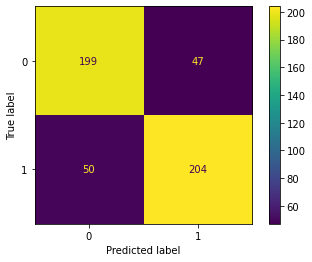

In [17]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, x_test, y_test)
plt.show()